## Modelling molecules with brownian motion (discretely).

Brownian motion is a real-valued stochastic process $\{B(t):y\geq 0\}$ with the following properties:

(i) B(0) = 0 (can loosen this def. to have $B(0) = x \in \mathbb{R}$)

(ii) Independent increments, i.e. for all times $0 \leq t_1 \leq t_2 \leq \dots \leq t_n, B(t_n) - B(t_{n-1}), \dots, B(t_2) - B(t_1)$ are independent random variables.

(iii) For all $t > 0$ and $h > 0, B(t+h) - B(t)$ is normally distributed with mean $0$ and variance $h$.

(iv) the mapping $t \rightarrow B(t)$ is continuous.

We're modeling Brownian motion discretely, so assuming the timesteps/increments are all equal, we're really modeling a summation of normally distributed displacements:

$$B(0) \sim N(0,\sigma)$$
$$B(1) \sim B(0) + N(0,\sigma)$$
$$B(2) \sim B(1) + N(0,\sigma)$$
$$ \cdots $$

Algorithm:
Start with a collection of discrete points.

For each time step, add to each point a value $(x,y) \in N(0,\sigma)$. 
Remark: The constant time steps represent the mean time between collisions, which is good enough to represent motion except in very small systems or very low densities, where the mean free path is comparable to the system size.

Repeat as necessary.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import random
from scipy.spatial import distance_matrix

In [2]:
# 1d brownian motion
def gen_normal(n_step=100, mean = 0, sd = 1, start = 0):
        
    point = np.ones(n_step)*start
        
    for i in range(1,n_step):
        normal = np.random.normal(mean, sd)
        point[i] = point[i-1] + normal
        
    return point

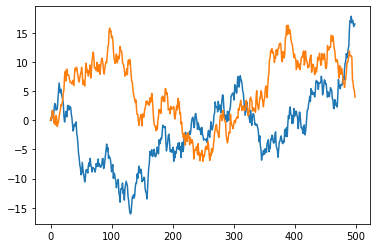

In [3]:
# how 2 particles under same Brownian Motion move on a line starting at 0 
for i in range(2):
    plt.plot(gen_normal(500))
plt.show()

<IPython.core.display.Javascript object>


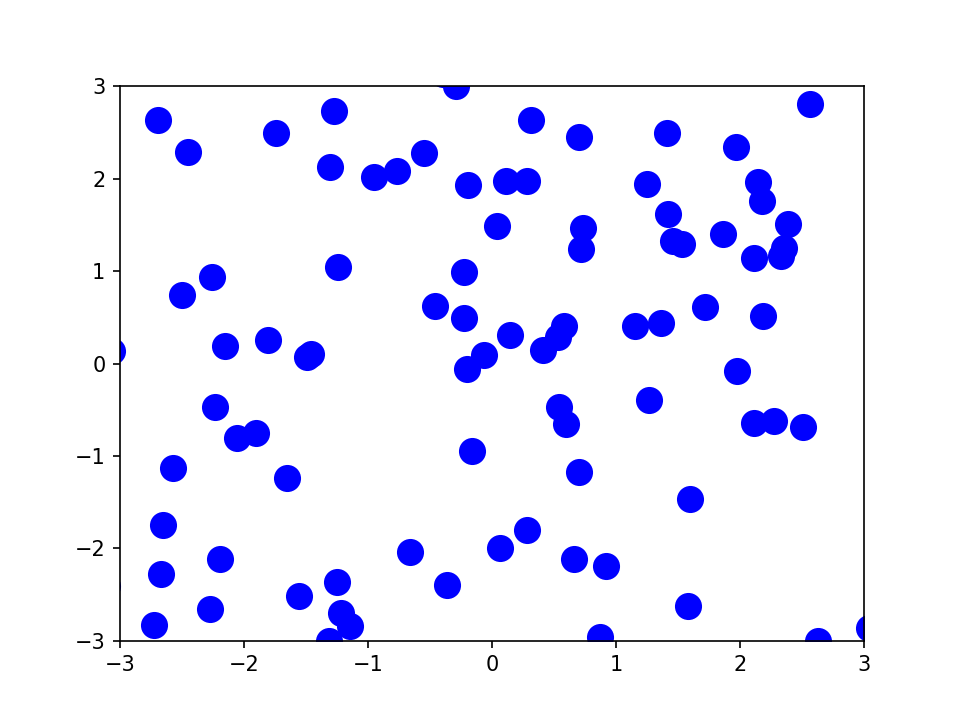

In [4]:
#remove this if running as .py file
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot()

# 2d brownian motion is 2 1d-points put together
steps = 2000
particles = 100
jitter = 0.04

#lets pretend the particles have radius r
r = 0.05

ax.set_xlim([-3,3])
ax.set_ylim([-3,3])

# generate points
points = np.zeros((particles,steps*2))

for i in range(particles):
    points[i,::2] = gen_normal(steps, 0, jitter, np.random.uniform(-3,3))
    points[i,1::2] = gen_normal(steps, 0, jitter, np.random.uniform(-3,3))

# create the first plot
pnt = ax.plot(np.zeros((1,particles)), np.zeros((1,particles)), 'o', color = "blue", markersize = 12)

# move the point position at every frame

def update_point(n, points, pnt):
    for point_i, index in zip(pnt,range(particles)):
        point_i.set_data((points[index,2*n], points[index,2*n+1]))
    return pnt

ani = animation.FuncAnimation(fig, update_point, steps - 1, fargs=(points, pnt), interval = 10)

plt.show()

In [52]:
#calculating distance between 2 points
distance_matrix(points[:,0:2],points[:,0:2])

array([[0.        , 2.28900738, 0.97926595, 1.66829614],
       [2.28900738, 0.        , 2.80282344, 3.45011717],
       [0.97926595, 2.80282344, 0.        , 2.39652352],
       [1.66829614, 3.45011717, 2.39652352, 0.        ]])